In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the data from the CSV file
df = pd.read_csv('distributions_for_choropleth_map.csv')


In [2]:
df

,Harmoniae Country,Has Hesperomyces?,Hesperomyces Country
0,Algeria,0,Canada
1,Argentina,1,El Salvador
2,Armenia,0,Mexico
3,Austria,1,USA
4,Belarus,0,Argentina
...,...,...,...
82,United States of America,1,NaN
83,Venezuela,0,NaN
84,Vietnam,0,NaN
85,Wales,0,NaN


In [3]:
df.columns

Index(['Harmoniae Country', 'Has Hesperomyces?', 'Hesperomyces Country'], dtype='object')

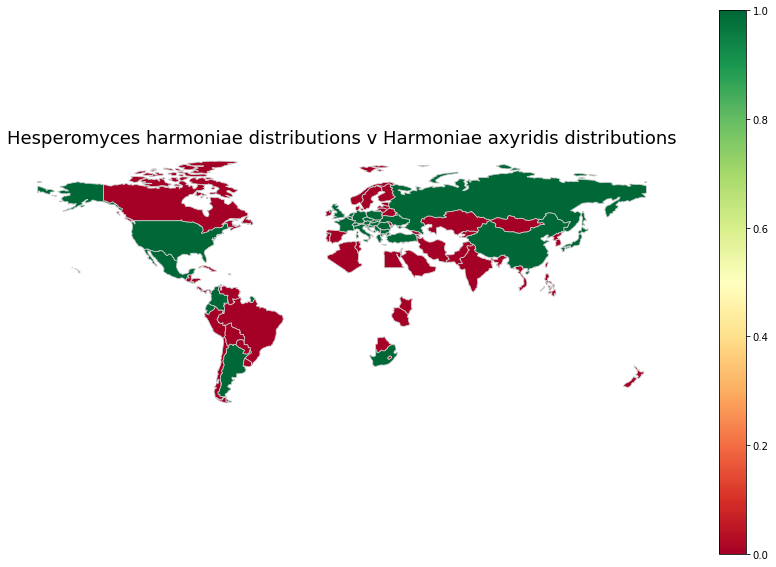

In [4]:

# Step 3: Load the shapefile for the world countries
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Step 4: Merge the data with the shapefile based on the 'name' column (country names)
merged_data = world_shapefile.merge(df, left_on='name', right_on='Harmoniae Country')

# Step 5: Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figsize here for a larger map

# Plot the map with the 'value' column as the color
merged_data.plot(column='Has Hesperomyces?', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title
plt.title('Hesperomyces harmoniae distributions v Harmoniae axyridis distributions', fontsize=18)

# Remove axis ticks and labels
ax.set_axis_off()

# Show the plot
plt.show()


In [5]:
world_shapefile

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


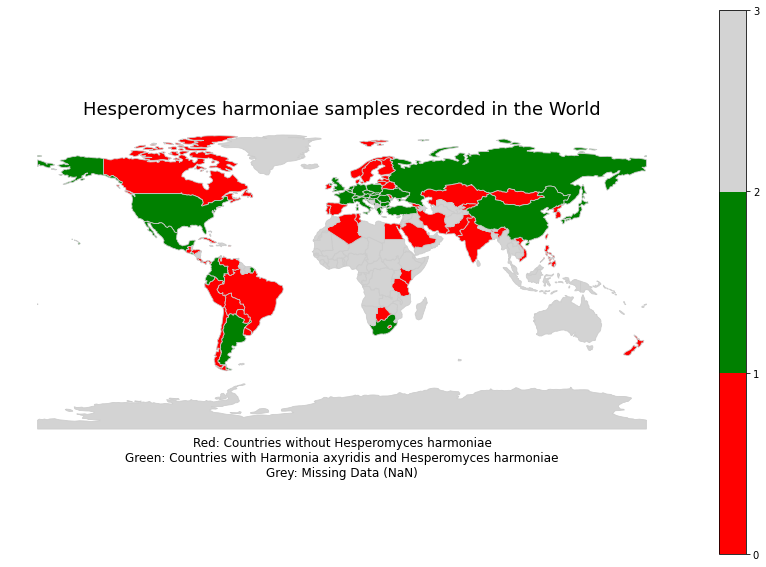

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your data into a DataFrame (assuming your data is already loaded)
# ... (your code to load the data into 'df')

# Step 2: Load the shapefile for the world countries
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Step 3: Merge the data with the shapefile based on the 'name' column (country names)
merged_data = world_shapefile.merge(df, left_on='name', right_on='Harmoniae Country', how='left')

# Step 4: Fill missing values (countries not in the merge) with 2
merged_data['Has Hesperomyces?'].fillna(2, inplace=True)

# Step 5: Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figsize here for a larger map

# Specify colors for the choropleth map (red for 0, green for 1, and grey for 2)
cmap = plt.cm.colors.ListedColormap(['red', 'green', 'lightgrey'])
bounds = [0, 1, 2, 3]  # The values that correspond to each color in the colormap
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the map with the 'value' column as the color
merged_data.plot(column='Has Hesperomyces?', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm)#, missing_kwds={'color': missing_color})

# Set the title
plt.title('Hesperomyces harmoniae samples recorded in the World', fontsize=18)

# Add a caption
caption_text = "Red: Countries without Hesperomyces harmoniae\nGreen: Countries with Harmonia axyridis and Hesperomyces harmoniae\nGrey: Missing Data (NaN)"
plt.text(0.5, -0.1, caption_text, ha='center', fontsize=12, transform=ax.transAxes)

# Remove axis ticks and labels
ax.set_axis_off()

# Show the plot
plt.show()


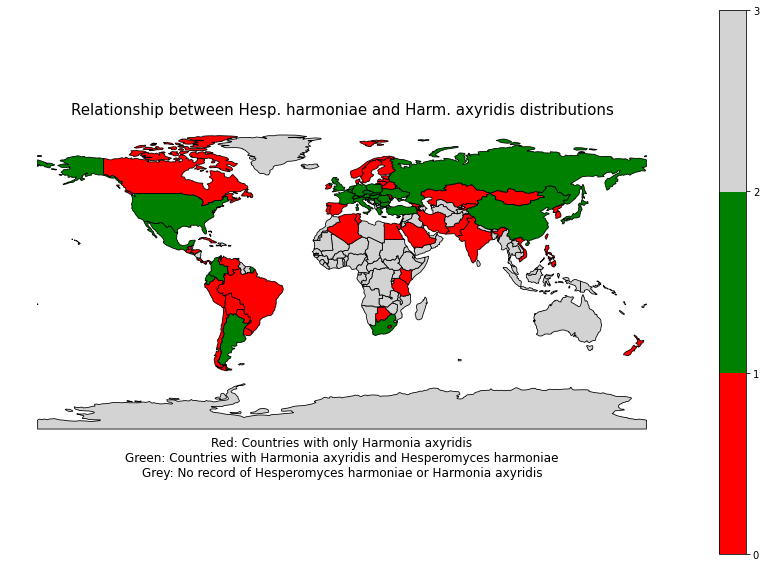

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your data into a DataFrame (assuming your data is already loaded)
# ... (your code to load the data into 'df')

# Step 2: Load the shapefile for the world countries
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Step 3: Merge the data with the shapefile based on the 'name' column (country names)
merged_data = world_shapefile.merge(df, left_on='name', right_on='Harmoniae Country', how='left')

# Step 4: Fill missing values (countries not in the merge) with 2
merged_data['Has Hesperomyces?'].fillna(2, inplace=True)

# Step 5: Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figsize here for a larger map

# Specify colors for the choropleth map (red for 0, green for 1, and grey for 2)
cmap = plt.cm.colors.ListedColormap(['red', 'green', 'lightgrey'])
bounds = [0, 1, 2, 3]  # The values that correspond to each color in the colormap
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the map with the 'value' column as the color and black borders
merged_data.plot(column='Has Hesperomyces?', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=True, norm=norm, missing_kwds={'color': 'lightgrey'})

# Set the title
plt.title('Relationship between Hesp. harmoniae and Harm. axyridis distributions', fontsize=15)

# Add a caption
caption_text = "Red: Countries with only Harmonia axyridis\nGreen: Countries with Harmonia axyridis and Hesperomyces harmoniae\nGrey: No record of Hesperomyces harmoniae or Harmonia axyridis"
plt.text(0.5, -0.1, caption_text, ha='center', fontsize=12, transform=ax.transAxes)

# Remove axis ticks and labels
ax.set_axis_off()

# Show the plot
plt.show()


In [17]:
fig.savefig('choroplethmap.svg', format='svg')

In [8]:
world_shapefile.to_csv('world shapefile.csv')

In [9]:
merged_data.to_csv('merge.csv')

In [10]:
df2 = pd.read_csv('merge.csv')

In [11]:
df2.loc[df2['name']== 'Kyrgyzstan']

,Unnamed: 0,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Harmoniae Country,Has Hesperomyces?,Hesperomyces Country
105,105,6456900.0,Asia,Kyrgyzstan,KGZ,8454,POLYGON ((70.96231489449914 42.266154283205495...,Kyrgyzstan,0.0,NaN
